# Welcome to Tapy

<img src="pics/TaPy_logo.png"  width="250" height="250"/>

This notebook will illustrate the use of the TaPy library by going through a typical analysis

## Set up system

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import gridspec
%matplotlib notebook

Add TaPy to python path

In [2]:
root_folder = os.path.dirname(os.getcwd())
sys.path.append(root_folder)
import tapy
from tapy.grating_interferometer import GratingInterferometer
from tapy.roi import ROI

## Data Folders

Open Beam data path

In [3]:
path_ob = '../data/data_OB/'
assert os.path.exists(path_ob)

Sample data path

In [4]:
path_im = '../data/data_smp'
assert os.path.exists(path_im)

Dark Current data path

In [5]:
path_df = '../data/data_df'
assert os.path.exists(path_df)

## Loading Data 

In [6]:
o_grating = GratingInterferometer()
o_grating.load(folder=path_im)
o_grating.load(folder=path_ob, data_type='ob')
o_grating.load(folder=path_df, data_type='df')

## Dark Field (DF) correction 

In [7]:
o_grating.df_correction()

## Normalization of the data 

We will use a normalization ROI.
```
 x0 = 3
 y0 = 5
 width = 20
 height = 40
```

In [8]:
#norm_roi = ROI(x0=3, y0=5, width=20, height=40)
#o_grating.normalization(roi=norm_roi)

## Calculate and display oscillation

<IPython.core.display.Javascript object>


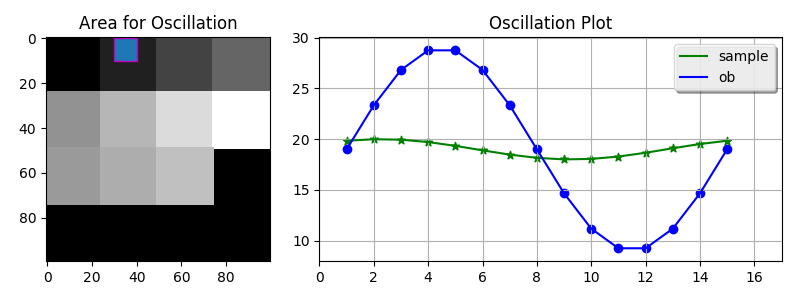

In [9]:
x0=30
y0=0
width=10
height=10

osc_roi = ROI(x0=x0, y0=y0, width=width, height=height)
o_grating.oscillation(roi=osc_roi, plot=True)

sample_oscillation = o_grating.data['sample']['oscillation']
ob_oscillation = o_grating.data['ob']['oscillation']

## Binning

In [10]:
o_grating.binning(bin=2)

## Calculation of transmission, differntial phase contrast, dark field and visibility map

In [11]:
o_grating.create_interferometry_images()

<IPython.core.display.Javascript object>


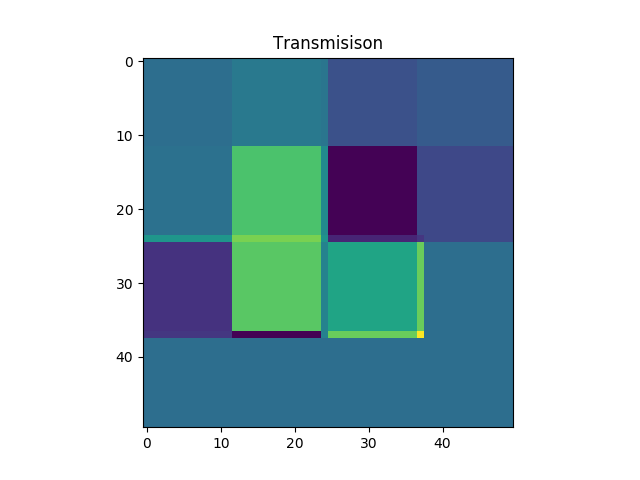

In [12]:
transmission = o_grating.interferometry['transmission']
plt.figure(2)
plt.title("Transmisison")
plt.imshow(transmission)

<IPython.core.display.Javascript object>


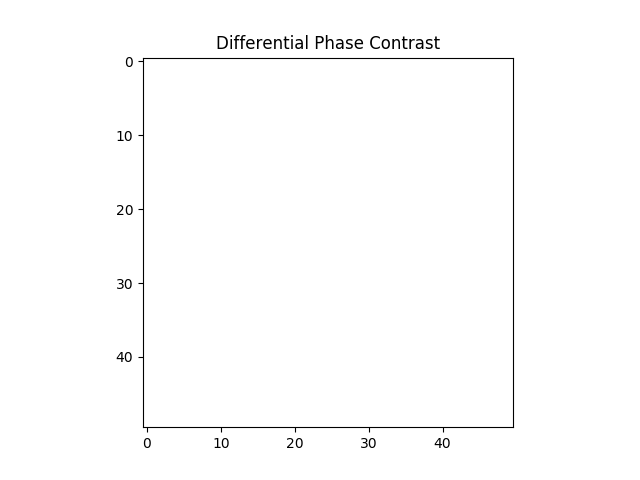

In [13]:
differential_phase_contrast = o_grating.interferometry['diff_phase_contrast']
plt.figure(3)
plt.title("Differential Phase Contrast")
plt.imshow(differential_phase_contrast)

<IPython.core.display.Javascript object>


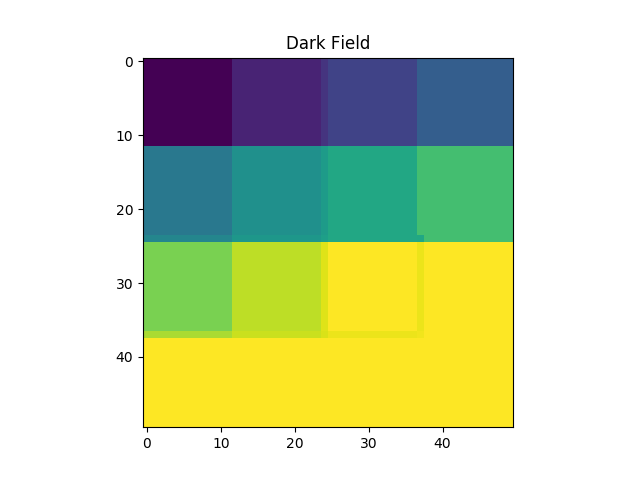

In [14]:
dark_field = o_grating.interferometry['dark_field']
plt.figure(4)
plt.title("Dark Field")
plt.imshow(dark_field)

<IPython.core.display.Javascript object>


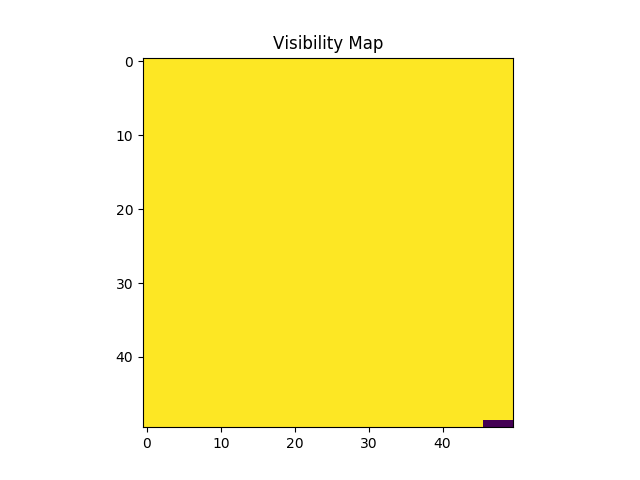

In [15]:
visibility_map = o_grating.interferometry['visibility_map']
plt.figure(5)
plt.title("Visibility Map")
plt.imshow(visibility_map)

## Export Images Created 

The following created arrays can be exported

 **data_type:**
  - 'transmission' (default)
  - 'diff_phase_contrast'
  - 'dark_field'
  - 'visibility_map'
  
in the following **file_type** formats:
 - 'tif' (default)
 - 'fits'

In [16]:
output_folder = '/Users/j35/Desktop/tmp/'
o_grating.export(folder=output_folder, data_type='transmission', file_type='tif')